In [2]:
from __future__ import absolute_import
import sys
sys.path.append('/home/yichun/projects/information_retrieval')
import matplotlib.pyplot as plt
from word_embedding.Word2vec import Word2vec
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

infile = '/home/yichun/projects/information_retrieval/word_embedding/word2vec_model_100d'
vectorizer = Word2vec(infile)

### Find close words in word2vec model

In [5]:
def store_close_words():
    keys = ['rupture', 'prestation', 'relation' ,'travail', 'contrat', 'préavis', 'indemnité',  'commerciales', 'congés', 'payés']
    df = pd.DataFrame(keys, columns =['word'])
    df['close_words'] = df['word'].apply(lambda x:vectorizer.get_most_similar_words(x))
    df.to_csv('/home/yichun/projects/information_retrieval/data/similar_words_in_word2vec_model', index=False)
    print(df.head())

In [6]:
store_close_words()

         word                                        close_words
0     rupture  [contrat, résiliation, apprentissage, clause, ...
1  prestation  [compensatoire, alimentaire, pension, capital,...
2    relation  [foi, quotidienne, mauvaise, certificat, temps...
3     travail  [rupture, contrat, 3253-5, sécurisation, mauva...
4     contrat  [bail, rupture, résiliation, mauvaise, indéter...


In [7]:
def display_closestwords_tsnescatterplot(word):
    """
    copy from 'https://gist.github.com/aneesha/da9216fb8d84245f7af6edaa14f4efa9#file-display_closestwords_tsnescatterplot-ipynb'
    :return:
    """
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    close_words = vectorizer.get_most_similar_words(word)

    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([vectorizer.model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = vectorizer.model[wrd_score[0]]
        word_labels.append(wrd_score)
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

### Data visualization for close words

         word                                        close_words
0     rupture  [contrat, résiliation, apprentissage, clause, ...
1  prestation  [compensatoire, alimentaire, pension, capital,...
2    relation  [foi, quotidienne, mauvaise, certificat, temps...
3     travail  [rupture, contrat, 3253-5, sécurisation, mauva...
4     contrat  [bail, rupture, résiliation, mauvaise, indéter...
Close words of word licenciement


/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


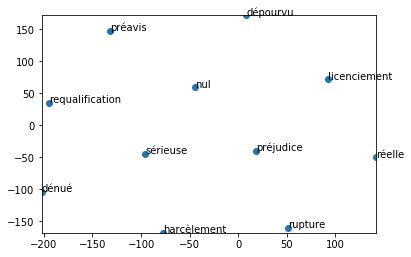

Close words of word rupture


/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


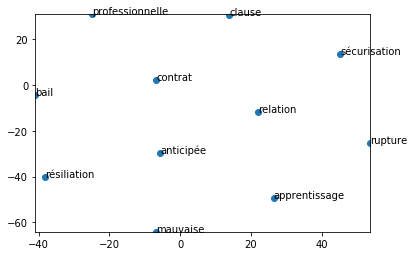

Close words of word indemnité


/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/home/yichun/.virtualenvs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


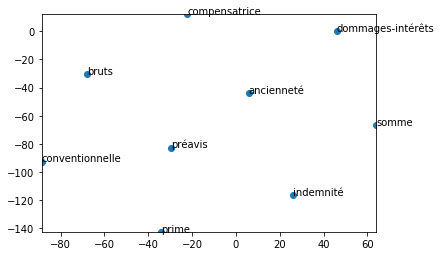

In [8]:
store_close_words()
keys = ['licenciement', 'rupture', 'indemnité']
for w in keys:
    print('Close words of word', w)
    display_closestwords_tsnescatterplot(w)